<a href="https://colab.research.google.com/github/c-e-leiva/AprendizajeAutomatico/blob/main/ClasificacionBank_LeivaCarlosEzequiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MACHINE LEARNING** 🤖📊
##**CLASIFICACIÓN - DESAFIO**


## **CONSIGNAS:** 📌

1) Deberá elegir un dataset no trabajado en clases para clasificación

2) Elija un dataset para tarea de clasificación del siguiente enlace. [aquí](https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=NumHits&search=)

3) No podrá repetir o utilizar el mismo dataset que algún otro estudiante. Para ello debe postear en este grupo cual es su dataset elegido. Una vez elegido no podrá cambiarlo.

4) Debe postear aquí como entrega el enlace a su notebook colab público, también almacenado en su github.

5) En su notebook debe tener como mínimo los siguientes apartados:

5.1 Presentación del dataset

5.2 Pre-procesamiento del dataset

5.3 Explicación del objetivo (qué es lo que se quiere clasificar, si es binaria o no, cuáles son las clases, etc)

5.4 Elección de modelos de clasificación a entrenar (minimo dos modelos, y uno de ellos debe entrenarlo con diferentes hiperparámetros para mostrar su desempeño)

5.4 División del dataset para entrenar (set de entrenamiento, testeo, si usará o no cross validation)

5.5 Entrenamiento de los modelos

5.6 Resultados obtenidos y su análisis (contrastar métricas, matriz de confusión)

5.7 Análisis de la experiencia, elección de modelo candidato

--------------




#**Elección y presentación del dataset:**

El dataset "Bank Marketing" se organiza en dos carpetas: bank y bank-additional, cada una con un archivo que contiene el 10% de los datos (bank.csv y bank-additional.csv) y otro con el dataset completo (bank-full.csv y bank-additional-full.csv). bank-additional es la versión más actualizada y contiene 20 variables en lugar de 17, lo que aporta mayor riqueza de información. Para el modelo de clasificación, se utilizará bank-additional-full.csv por su detalle y confiabilidad.

In [85]:
import pandas as pd
# Cargar el dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Mostrar las primeras 10 filas
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##**Definición del Objetivo del Modelo**
El propósito de este modelo es clasificar a los clientes en función de su decisión de suscribir o no a un depósito a plazo fijo. Este es un problema de clasificación binaria, donde las clases se definen como:

**YES:** El cliente suscribió un depósito.

**NO:** El cliente no suscribió un depósito.

In [86]:
#importacion librerias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## **Pre-procesamiento del Dataset:**

En esta sección, se identifican las variables categóricas y numéricas del dataset. Luego, se lleva a cabo la codificación de las variables categóricas y se separan las características (X) de la variable objetivo (y). Finalmente, se realiza la división del dataset en conjuntos de entrenamiento y prueba, así como el escalado de las características para mejorar el rendimiento de los modelos.

In [87]:
# Variables categóricas y numéricas
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Selección de Modelos de Clasificación**
Se seleccionan y entrenan varios modelos de clasificación, que incluyen:

- Árbol de Decisión
- Máquinas de Vectores de Soporte (SVM)
- Regresión Logística, con la intención de ajustar sus hiperparámetros.

In [88]:
# 1. Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Máquinas de Vectores de Soporte (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 3. Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

##**Evaluación de los Modelos**
Se evalúa el rendimiento de cada modelo utilizando métricas como la matriz de confusión y el informe de clasificación. Esto permite analizar la efectividad de cada enfoque en la predicción de la suscripción a depósitos.

In [ ]:
# Evaluar el modelo de Árbol de Decisión
dt_predictions = dt_model.predict(X_test)
print("Árbol de Decisión")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Evaluar el modelo SVM
svm_predictions = svm_model.predict(X_test)
print("Máquinas de Vectores de Soporte")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Evaluar el modelo de Regresión Logística
logistic_predictions = logistic_model.predict(X_test)
print("Regresión Logística")
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

Árbol de Decisión
[[6814  489]
 [ 448  487]]
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Máquinas de Vectores de Soporte
[[7146  157]
 [ 639  296]]
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7303
        True       0.65      0.32      0.43       935

    accuracy                           0.90      8238
   macro avg       0.79      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238

Regresión Logística
[[7103  200]
 [ 529  406]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                   

Los resultados muestran que, aunque todos los modelos presentan un rendimiento sólido en la clasificación de la clase negativa, tienen dificultades para detectar la clase positiva, evidenciando un desbalance en el conjunto de datos. La Regresión Logística destaca como el modelo más efectivo, aunque su capacidad para identificar instancias de la clase positiva es limitada. Para abordar este problema, planeo optimizar el modelo de Regresión Logística ajustando sus hiperparámetros, con el objetivo de mejorar la precisión y el recall en la detección de la clase positiva.

## **Visualización**

Se usa seaborn para graficar la matriz de confusión, que muestra la cantidad de predicciones correctas e incorrectas para cada clase ('no' y 'yes').

Árbol de Decisión
[[6814  489]
 [ 448  487]]
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



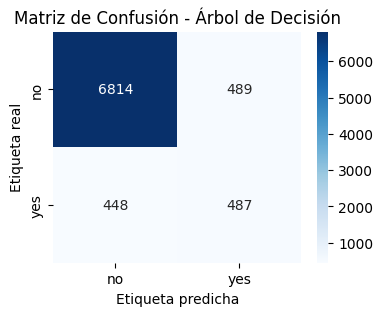

Máquinas de Vectores de Soporte
[[7146  157]
 [ 639  296]]
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7303
        True       0.65      0.32      0.43       935

    accuracy                           0.90      8238
   macro avg       0.79      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238



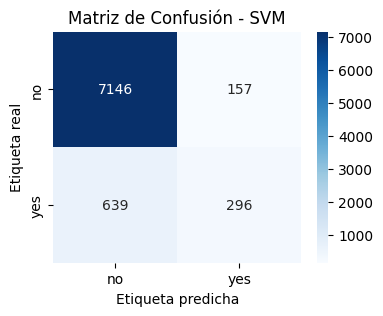

Regresión Logística
[[7103  200]
 [ 529  406]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



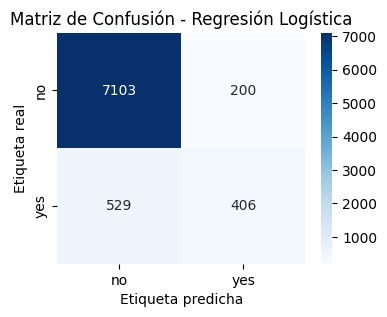

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluar el modelo de Árbol de Decisión
dt_predictions = dt_model.predict(X_test)
print("Árbol de Decisión")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Graficar la matriz de confusión para Árbol de Decisión
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Evaluar el modelo SVM
svm_predictions = svm_model.predict(X_test)
print("Máquinas de Vectores de Soporte")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Graficar la matriz de confusión para SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de Confusión - SVM')
plt.show()

# Evaluar el modelo de Regresión Logística
logistic_predictions = logistic_model.predict(X_test)
print("Regresión Logística")
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

# Graficar la matriz de confusión para Regresión Logística
logistic_cm = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

## **Optimización de Hiperparámetros con GridSearchCV**
Se ajustaron los hiperparámetros del modelo de Regresión Logística para optimizar su rendimiento. Se utiliza **GridSearchCV** para evaluar diversas combinaciones de parámetros, buscando mejorar el balanceo de clases mediante el uso de `class_weight='balanced'`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definir el modelo con pipeline
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Definir los hiperparámetros que se desean ajustar
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 1.3, 1.5],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Imprimir la mejor puntuación
print(f"Mejor puntuación (accuracy): {grid_search.best_score_}")

# Realizar predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 1.5}
Mejor puntuación (accuracy): 0.8603338391502275
Matriz de Confusión:
[[6263 1040]
 [  99  836]]
Informe de Clasificación:
              precision    recall  f1-score   support

       False       0.98      0.86      0.92      7303
        True       0.45      0.89      0.59       935

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.92      0.86      0.88      8238

Precisión: 0.86


La optimización de hiperparámetros del modelo de Regresión Logística con GridSearchCV resultó en una mejora del rendimiento, alcanzando una precisión de 0.86 tras ajustar C a 1.5. Aunque la precisión para la clase negativa es alta, la detección de la clase positiva sigue siendo un desafío, evidenciado por su menor precisión y recall. Esto indica que, aunque se logró un mejor equilibrio en el rendimiento general, aún hay oportunidades de mejora. Para futuros ajustes, se podrían explorar técnicas como la selección de características y la normalización de datos, así como experimentar con otros valores de C y ajustes adicionales de hiperparámetros.

## **Visualización de Resultados del Modelo de Regresión Logística**

Este gráfico presenta la matriz de confusión y el informe de clasificación del modelo de regresión logística. La matriz de confusión ilustra las predicciones correctas e incorrectas, mientras que el informe de clasificación detalla métricas como precisión, recall y f1-score, proporcionando una evaluación concisa del rendimiento del modelo en la clasificación de las clases.



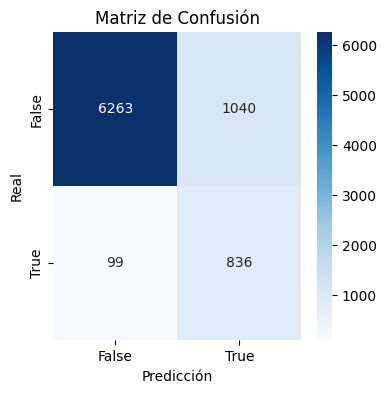

<Figure size 400x400 with 0 Axes>

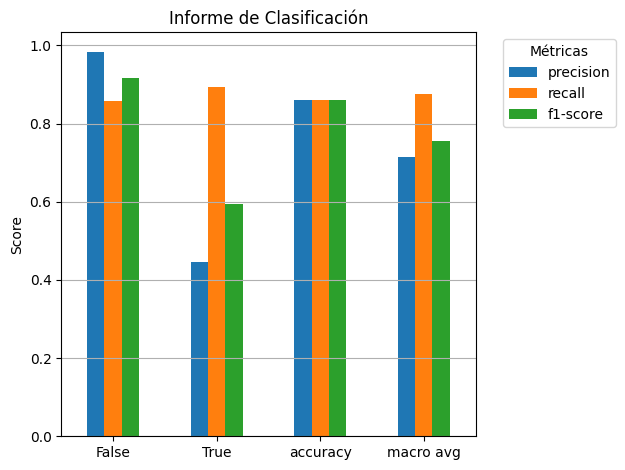

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Configurar la figura
plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el informe en un DataFrame para graficar
report_df = pd.DataFrame(report).transpose()

# Graficar precisión, recall y F1-score
plt.figure(figsize=(4, 4))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar',
                                                               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Informe de Clasificación')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Análisis del Desbalanceo de Clases**


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

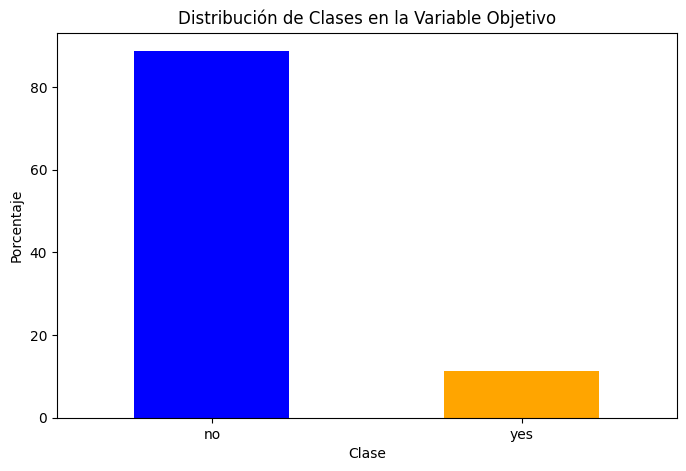

In [ ]:
# **Análisis del Desbalanceo de Clases**

# Imprimir las primeras filas del DataFrame para una vista general
print(df.head())

# Analizar la distribución de la variable objetivo
class_distribution = df['y'].value_counts(normalize=True) * 100
print("\nDistribución de Clases:")
print(class_distribution)

# Graficar la distribución de clases
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar el desbalanceo
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Clases en la Variable Objetivo')
plt.xlabel('Clase')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.show()


La distribución de clases revela un fuerte desbalance, con un 88.73% de datos en la clase negativa ("no") y solo un 11.27% en la clase positiva ("yes"). Este desbalance puede perjudicar el rendimiento de los modelos, ya que tienden a predecir más la clase mayoritaria, lo que se refleja en resultados previos con baja precisión y recall para la clase positiva. Para mejorar esto, se podrían aplicar técnicas de muestreo, como el sobremuestreo de la clase minoritaria o ajustar hiperparámetros para optimizar la detección de la clase positiva.

# ANÁLISIS GENERAL

El análisis realizado abarca varios modelos, incluyendo Árbol de Decisión, Máquinas de Vectores de Soporte y Regresión Logística, cada uno con sus respectivas evaluaciones de rendimiento. Aunque se observaron métricas aceptables, los resultados también evidencian un notable desbalance de clases, donde la clase negativa predomina significativamente sobre la positiva. Este desbalance afectó la capacidad de los modelos para identificar correctamente la clase minoritaria, lo que resalta la necesidad de aplicar técnicas de optimización y ajuste de hiperparámetros, especialmente en el modelo de Regresión Logística, donde se empleó GridSearchCV para mejorar su rendimiento.

El desafío de manejar este desbalanceo y optimizar los modelos ha sido significativo, ya que requiere una mayor práctica y entrenamiento para comprender cómo ajustar correctamente los parámetros y seleccionar las estrategias adecuadas. Sin embargo, cada nueva experiencia en estas prácticas me permitirá ir mejorando mis habilidades y acercarme a resultados más óptimos en futuras implementaciones.

### Recursos Utilizados

- **NumPy**: Operaciones matemáticas y manipulación de arreglos.
- **Pandas**: Carga y limpieza de datos.
- **Scikit-learn**: Modelos de aprendizaje automático y optimización de hiperparámetros con GridSearchCV.
- **Matplotlib y Seaborn**: Visualización de datos y resultados.
- **ChatGPT**: Consultas y análisis sobre desbalanceo de clases.

### Prompts sobre Desbalanceo de Clases

1. **Conceptos Básicos**:
   - "¿Qué es el desbalanceo de clases en el contexto del aprendizaje automático y por qué es un problema importante?"

2. **Causas del Desbalanceo**:
   - "¿Cuáles son las principales causas del desbalanceo de clases en un conjunto de datos?"

3. **Efectos del Desbalanceo**:
   - "¿Cómo afecta el desbalanceo de clases a la precisión y rendimiento de un modelo de clasificación?"

4. **Métodos para Tratar el Desbalanceo**:
   - "¿Cuáles son algunas técnicas comunes para tratar el desbalanceo de clases en un conjunto de datos?"
   - "¿Cómo se puede aplicar la técnica de sobremuestreo (oversampling) y submuestreo (undersampling)?"

5. **Uso de `class_weight='balanced'`**:
   - "¿Cómo puedo utilizar el parámetro `class_weight='balanced'` en Scikit-learn para abordar el desbalanceo de clases?"

6. **Implementación de Código**:
   - "Proporciona un ejemplo de código en Python que muestre cómo ajustar un modelo de clasificación utilizando `class_weight='balanced'` para manejar el desbalanceo de clases."

7. **Evaluación de Modelos Desbalanceados**:
   - "¿Qué métricas son más adecuadas para evaluar modelos de clasificación en un contexto de desbalanceo de clases?"

8. **Recomendaciones de Mejora**:
   - "¿Qué recomendaciones puedes dar para mejorar un modelo de clasificación que enfrenta desbalanceo de clases?"

### Recursos Adicionales

- **Artículos**:
  - "Understanding Class Imbalance" - Un artículo que describe los conceptos y técnicas para manejar el desbalanceo de clases.
  
- **Documentación de Scikit-learn**:
  - [Scikit-learn: Class Weight](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

- **Clases de Aprendizaje Automático**: Conocimientos prácticos en manejo de datos y evaluación de modelos.
